# pyhf usage in Top FC 

🎶 Simple HEP-like measurement for top quark flavour changing discovery 🎶

## HEP-like?

So what do we do as experimentalists in High Energy Physics? We have a gigantic detector that serves as a counting machine for physics. We smash particles and take pictures of the aftermath. Then we propose hypotheses for new physics that we want to test using this data. So we will have, at the very least:

* signal
* background (with some uncertainty)
* some observations

In [11]:
import json

import matplotlib.pyplot as plt
import numpy as np
import pyhf
from pyhf.contrib.viz import brazil

In [12]:
if "False": 
    print("Meisam")

Meisam


In [33]:
def UL_compute(nsig, nbkg, bkg_unc, AMS, model_def=True):    
    model = pyhf.simplemodels.uncorrelated_background(
    signal=[nsig], bkg=[nbkg], bkg_uncertainty=[nbkg*bkg_unc]
    )
    if model_def:
        print(f"  channels: {model.config.channels}")
        print(f"     nbins: {model.config.channel_nbins}")
        print(f"   samples: {model.config.samples}")
        print(f" modifiers: {model.config.modifiers}")
        print(f"parameters: {model.config.parameters}")
        print(f"  nauxdata: {model.config.nauxdata}")
        print(f"   auxdata: {model.config.auxdata}")
    
    observations = [nbkg] + model.config.auxdata
    poi_values = np.linspace(0.1, 1, 10)
    obs_limit, exp_limits, (scan, results) = pyhf.infer.intervals.upper_limits.upper_limit(
    observations, model, poi_values, level=0.05, return_results=True
    )
    print(f"Upper limit (obs): μ = {obs_limit:.4f}")
    print(f"Upper limit (exp): μ = {exp_limits[2]:.4f}")
    fig, ax = plt.subplots()
    fig.set_size_inches(10.5, 7)    
    ax.set_title("ttbar Hypothesis Tests for {} NN weight".format(AMS))
    artists = brazil.plot_results(poi_values, results, ax=ax)    

## ttbar-charm signal

### simple NN results

Upper limit (obs): μ = 0.2960
Upper limit (exp): μ = 0.2960


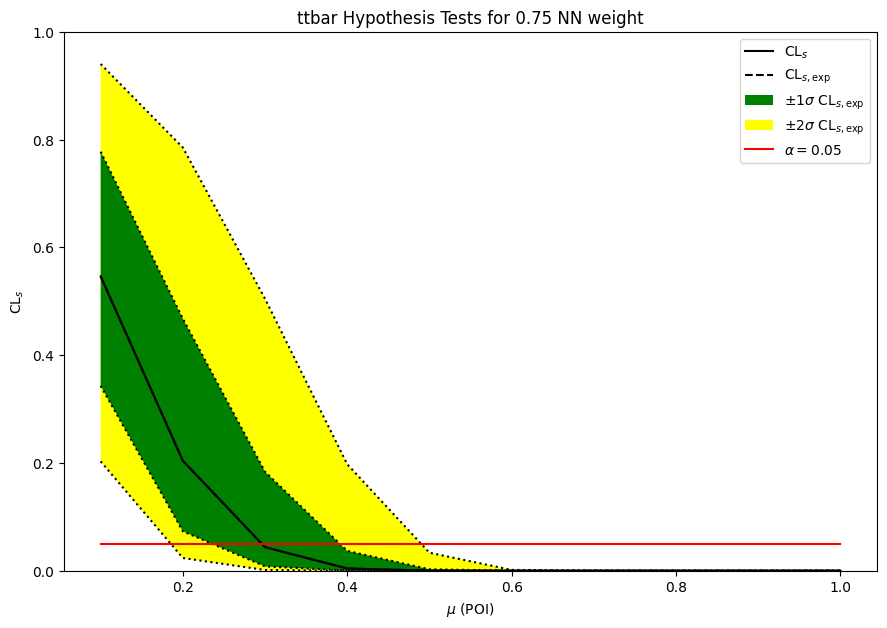

In [34]:
UL_compute(399.1, 269.1, 0.25, "0.75", False)    

Upper limit (obs): μ = 0.2855
Upper limit (exp): μ = 0.2855


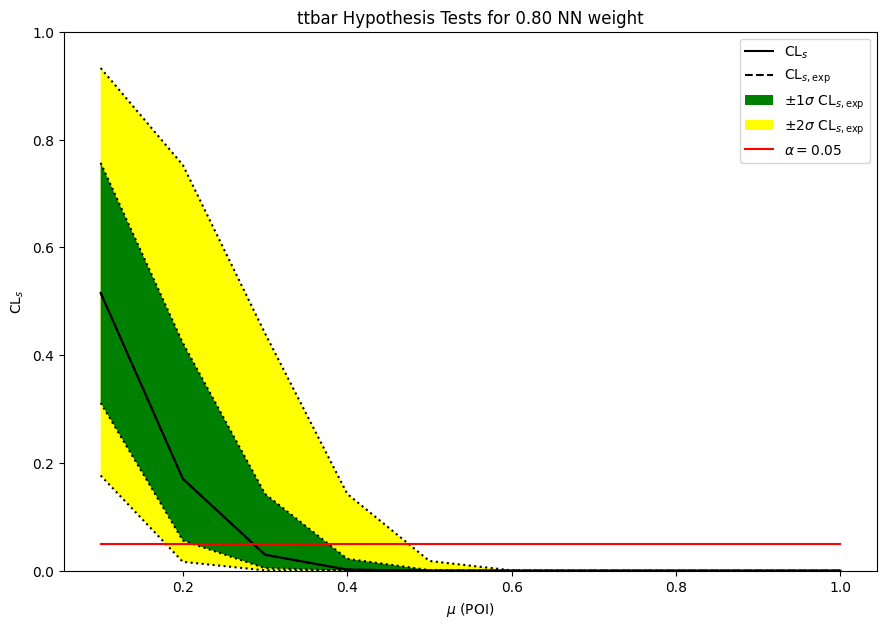

In [35]:
UL_compute(292.6, 180.8, 0.25, "0.80", False)    

Upper limit (obs): μ = 0.2855
Upper limit (exp): μ = 0.2855


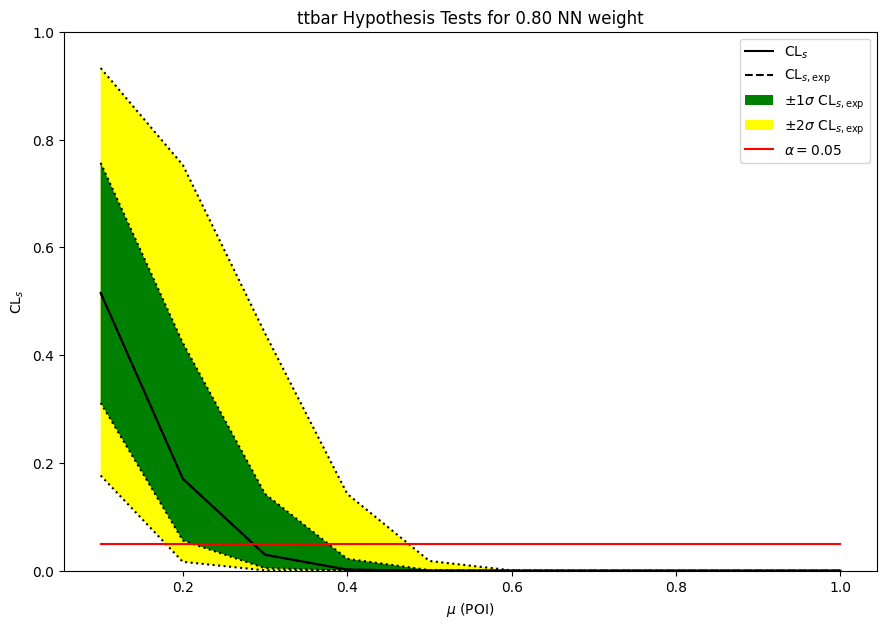

In [36]:
UL_compute(292.6, 180.8, 0.25, "0.80", False)    

Upper limit (obs): μ = 0.2801
Upper limit (exp): μ = 0.2801


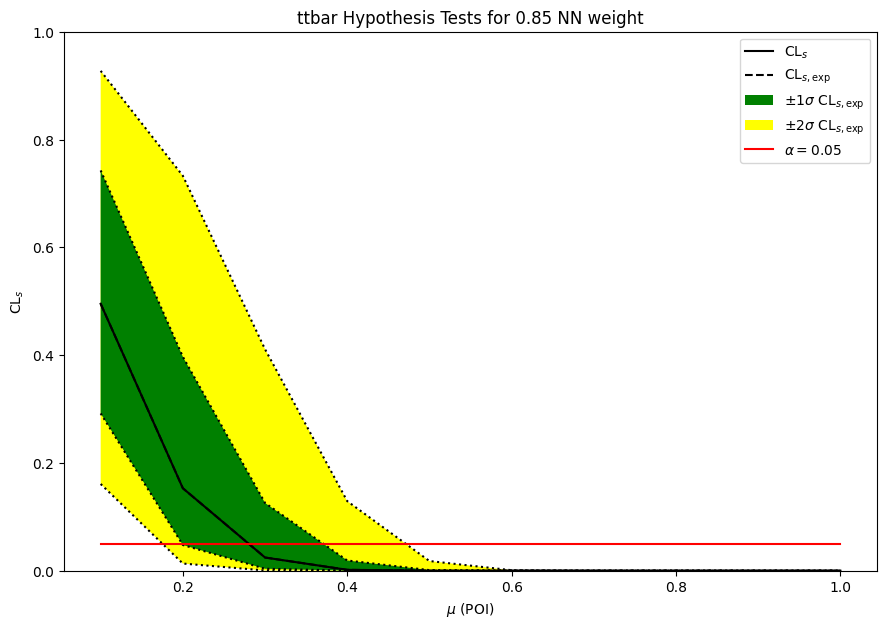

In [37]:
UL_compute(184.3, 105.3, 0.25, "0.85", False)    

### NN optimized

Upper limit (obs): μ = 0.2738
Upper limit (exp): μ = 0.2738


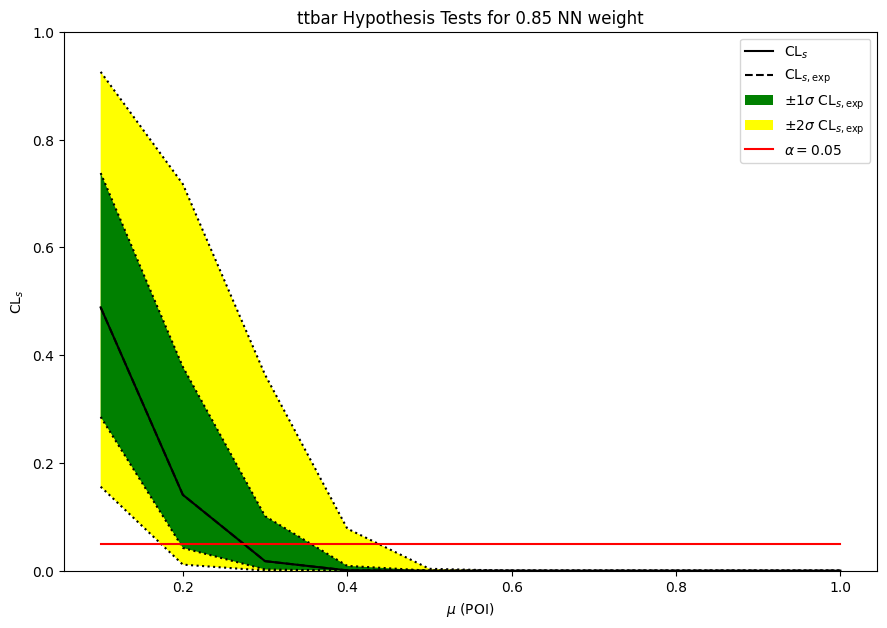

In [38]:
UL_compute(567.2, 337.9, 0.25, "0.85", False)    

Upper limit (obs): μ = 0.2401
Upper limit (exp): μ = 0.2401


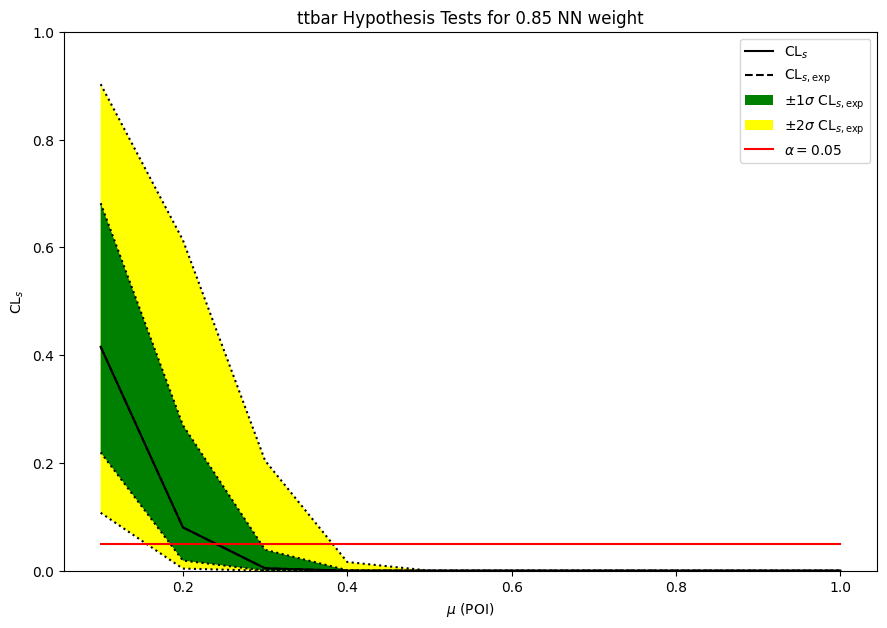

In [39]:
UL_compute(487.0, 246.6, 0.25, "0.85", False)    

Upper limit (obs): μ = 0.1937
Upper limit (exp): μ = 0.1937


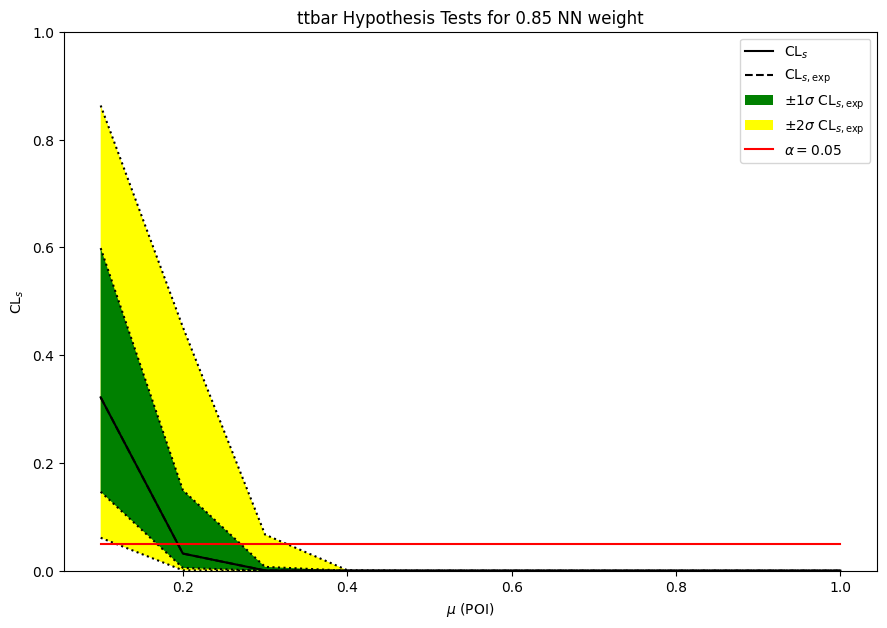

In [40]:
UL_compute(387.7, 160.1, 0.25, "0.85", False)    

Upper limit (obs): μ = 0.1934
Upper limit (exp): μ = 0.1934


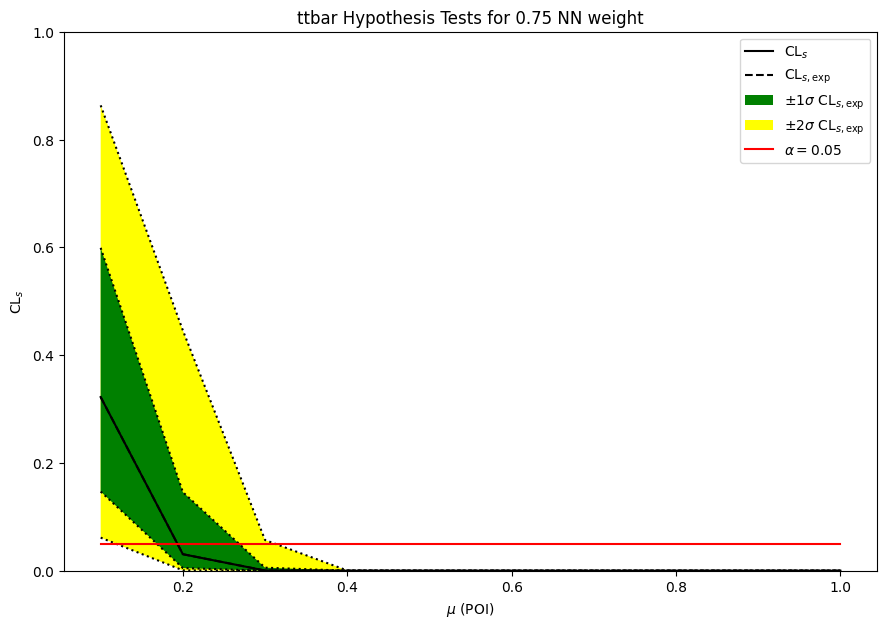

In [41]:
UL_compute(570.8, 240.7, 0.25, "0.75", False)    

Upper limit (obs): μ = 0.1821
Upper limit (exp): μ = 0.1821


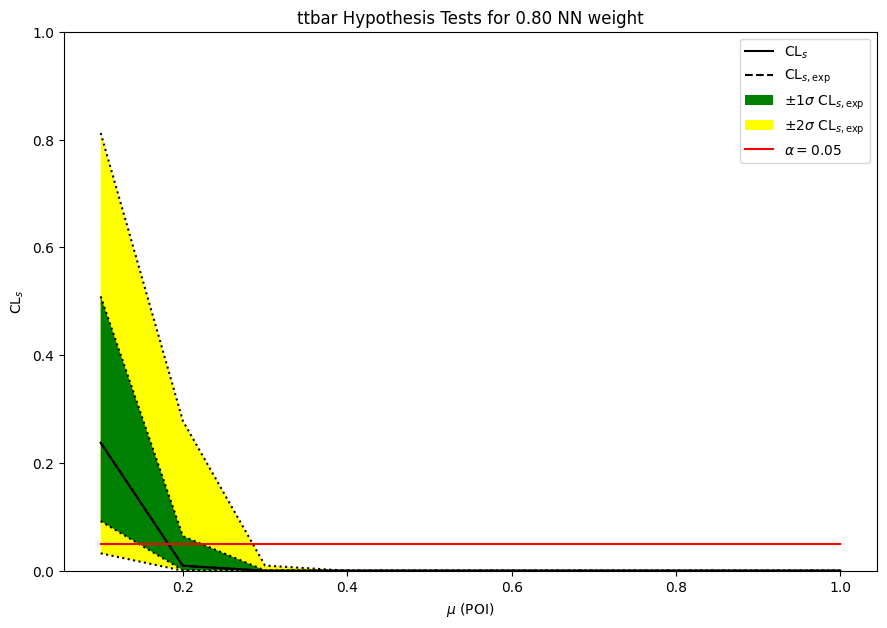

In [42]:
UL_compute(492.8, 173.9, 0.25, "0.80", False)    

Upper limit (obs): μ = 0.1699
Upper limit (exp): μ = 0.1699


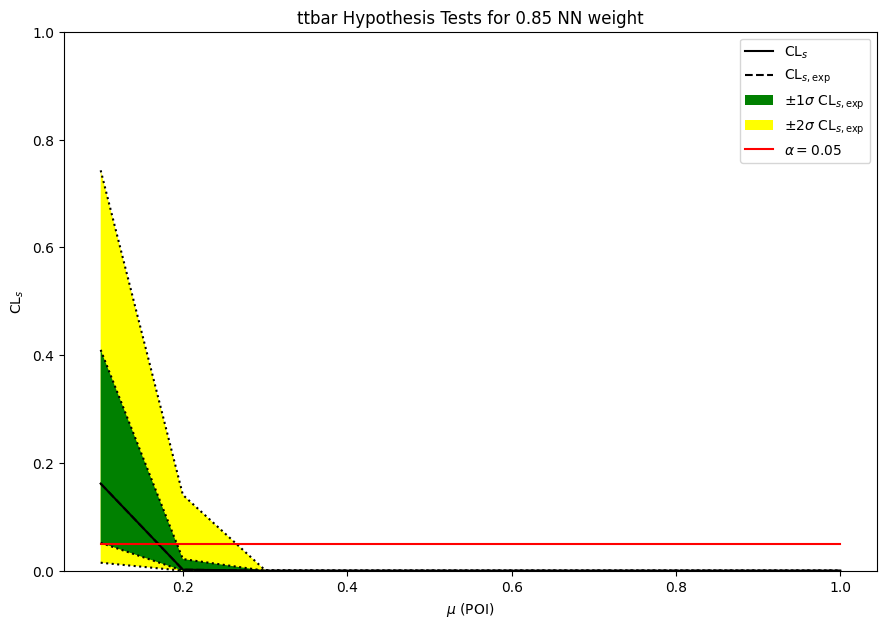

In [43]:
UL_compute(397.1, 116.7, 0.25, "0.85", False)    

## tW-charm signal

### optimized NN results

In [29]:
def tW_UL_compute(nsig, nbkg, bkg_unc, AMS, model_def=True):    
    model = pyhf.simplemodels.uncorrelated_background(
    signal=[nsig], bkg=[nbkg], bkg_uncertainty=[nbkg*bkg_unc]
    )
    if model_def:
        print(f"  channels: {model.config.channels}")
        print(f"     nbins: {model.config.channel_nbins}")
        print(f"   samples: {model.config.samples}")
        print(f" modifiers: {model.config.modifiers}")
        print(f"parameters: {model.config.parameters}")
        print(f"  nauxdata: {model.config.nauxdata}")
        print(f"   auxdata: {model.config.auxdata}")
    
    observations = [nbkg] + model.config.auxdata
    poi_values = np.linspace(0.1, 5, 10)
    obs_limit, exp_limits, (scan, results) = pyhf.infer.intervals.upper_limits.upper_limit(
    observations, model, poi_values, level=0.05, return_results=True
    )
    print(f"Upper limit (obs): μ = {obs_limit:.4f}")
    print(f"Upper limit (exp): μ = {exp_limits[2]:.4f}")
    fig, ax = plt.subplots()
    fig.set_size_inches(10.5, 7)    
    ax.set_title("tW Hypothesis Tests for {} NN weight".format(AMS))
    artists = brazil.plot_results(poi_values, results, ax=ax)    

Upper limit (obs): μ = 1.5141
Upper limit (exp): μ = 1.5141


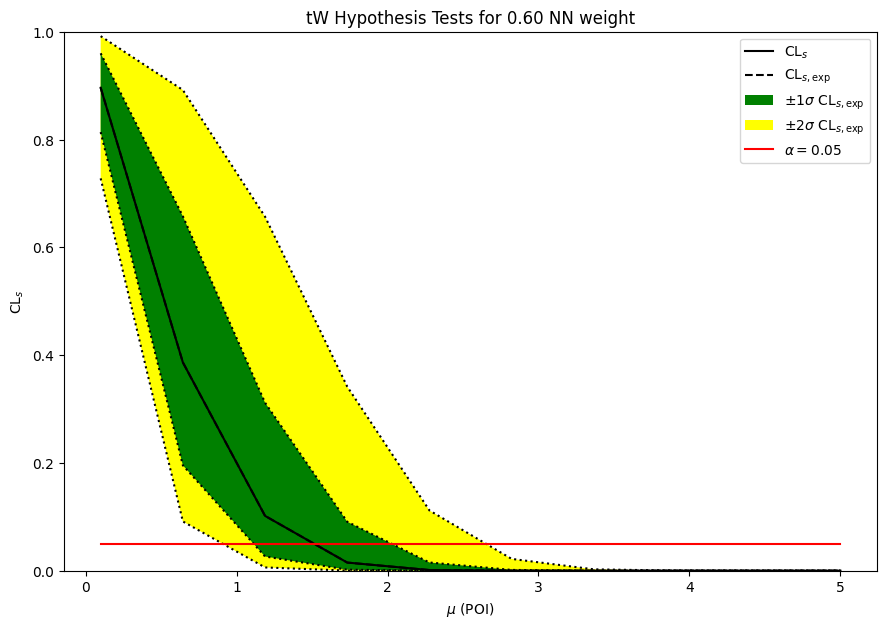

In [30]:
tW_UL_compute(15.6, 40.7, 0.25, "0.60", False)    

Upper limit (obs): μ = 1.1436
Upper limit (exp): μ = 1.1436


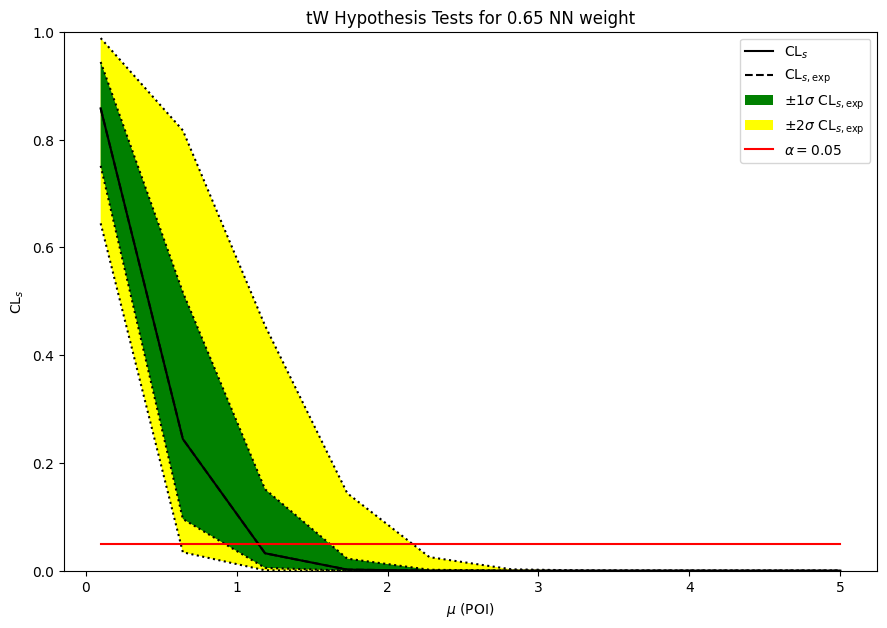

In [31]:
tW_UL_compute(13.0, 22.2, 0.25, "0.65", False)    

Upper limit (obs): μ = 1.0355
Upper limit (exp): μ = 1.0355


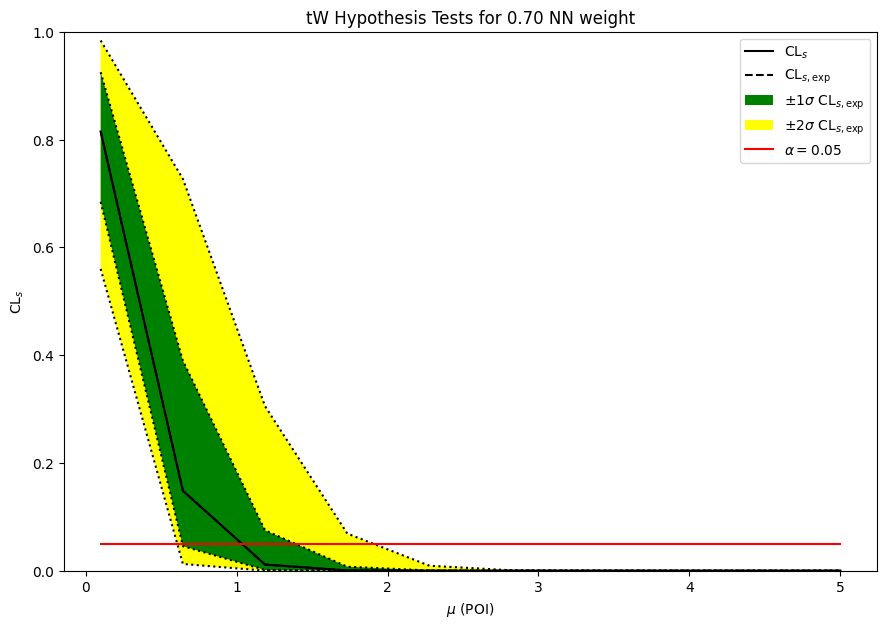

In [32]:
tW_UL_compute(10.4, 11.4, 0.25, "0.70", False)    

Hrmm, that didn't work. It seems we need to specify the parameter values to get the data for the model at those parameter values. Well, we know the default for $\mu=1$ and $\gamma = 1$. Also recall that the uncorrelated shape allocates a parameter per bin, so our model has **3 parameters** with **2 modifiers**. So let's just try that:

In [43]:
model.expected_data([1.0, 1.0])

array([668.2       ,  24.83361111])

In [44]:
model.expected_data([1.0, 1.0], include_auxdata=False)

array([668.2])

In [45]:
model.expected_auxdata([1.0, 1.0])

array([24.83361111])

In [47]:
model.config.modifiers

[('mu', 'normfactor'), ('uncorr_bkguncrt', 'shapesys')]

In [48]:
model.config.suggested_init()

[1.0, 1.0]

## Simple Inference

The core of statistical analysis is the statistical model. For inference, it's viewed as a function of the model parameters conditioned on the fixed observations.

$$
\log L(\theta | x) \propto \log p(x | \theta)
$$

The value of the likelihood is a float. Let's try it for both the background-only model as well as the signal+background model.

In [25]:
observations = [269.1] + model.config.auxdata  # this is a common pattern!

model.logpdf(pars=bkg_pars, data=observations)

array([-6.24518277])

In [28]:
model.logpdf(pars=[1,1], data=observations)

array([-160.5975293])

In [29]:
model.logpdf(pars=init_pars, data=observations)

array([-160.5975293])

We're not performing inference just yet. We're simply computing the 'logpdf' of the model specified by the parameters $\theta$ against the provided data. To perform a fit, we use the [inference API](https://pyhf.readthedocs.io/en/v0.7.1/api.html#inference) via `pyhf.infer`.

When fitting a model to data, we usually want to find the $\hat{\theta}$ which refers to the "Maximum Likelihood Estimate" of the model parameters. This is often referred to mathematically by

$$
\hat{\theta}_\text{MLE} = \text{argmax}_\theta L(\theta | x)
$$

Let's perform a unconstrained maximum likelihood fit on this model to the provided observations we just made up.

In [30]:
pyhf.infer.mle.fit(data=observations, pdf=model)

array([1.58827449e-20, 1.00000168e+00])

So what can we say? With nominal signal `[5, 10]` and nominal background = `[50, 60]` model components, an observed count of `[53, 65]` suggests best fit values:
* $\hat{\mu} \approx 0.54$,
* $\hat{\gamma} \approx [1,1]$.

## Simple Hypothesis Testing

Great, so we can fit. But that's not usually the interesting part, since we cannot make any statements about this. What we prefer to do is perform a hypothesis test to either:

* Reject Standard Model hypothesis &mdash; a discovery fit.
* Reject Beyond the Standard Model hypothesis &mdash; an exclusion fit.

So we need to compute test statistics in order to evaluate the hypothesis. If we know the distribution of the test statistic under two different hypotheses, we can compute a [CLs](https://en.wikipedia.org/wiki/CLs_method_(particle_physics)) value. This is a modified pseudo-frequentist $p\,$-value.

$$
\text{CL}_\text{s} = \frac{\text{CL}_\text{s+b}}{\text{CL}_\text{b}} = \frac{p_{\text{s+b}}}{1-p_{\text{b}}}
$$

with

$$
\text{CL}_\text{s+b} = \int_{t_\text{obs}}^\infty \text{d}t\ p_0(t | H_0) \qquad\qquad \text{CL}_\text{b} = \int_{t_\text{obs}}^\infty \text{d}t\ p_1(t | H_1)
$$

This is done by splitting the model parameters up into two groups:

* parameters of interest (POI &mdash; can have multiple!)
* nuisance parameters (NP)

Recall that additionally, all parameters are either constrained or unconstrained. Parameters of interest happen to always be unconstrained parameters.

$$
    f(\boldsymbol{x}|\phi) = f(\boldsymbol{x}|\overbrace{\eta}^{\llap{\text{free}}},\underbrace{\chi}_{\llap{\text{constrained}}}) = f(\boldsymbol{x}|\overbrace{\psi}^{\rlap{\text{parameters of interest}}},\underbrace{\theta}_{\rlap{\text{nuisance parameters}}})
$$

In the vast majority of cases, the test statistic is the profile likelihood ratio, or variations of it:

$$
t_\psi(x) = \frac{L(\psi, \hat{\hat{\theta}})}{L({\hat{\psi}, \hat{\theta}})}
$$

where

* $\hat{\hat{\theta}}$ is the best fitted value of the nuisance parameters (for fixed POIs)
* $\hat{\psi}$ and $\hat{\theta}$ are the best fitted values in a global fit

So let's run a limit setting (exclusion) hypothesis test for

* null hypothesis ($\mu = 1$) &mdash; "BSM physics process exists"
* alternate hypothesis ($\mu = 0$) &mdash; "Standard Model only physics"

In [31]:
CLs_obs, CLs_exp = pyhf.infer.hypotest(
    1.0,  # null hypothesis
    #[1000.0, 230.0] + model.config.auxdata,
    [269.1] + model.config.auxdata,
    #[53.0, 65.0] + model.config.auxdata,
    model,
    test_stat="q",
    return_expected_set=True,
)
print(f"      Observed CLs: {CLs_obs:.4f}")
for expected_value, n_sigma in zip(CLs_exp, np.arange(-2, 3)):
    print(f"Expected CLs({n_sigma:2d} σ): {expected_value:.4f}")

qmu test statistic used for fit configuration with POI bounded at zero.
Use the qmu_tilde test statistic (pyhf.infer.test_statistics.qmu_tilde) instead.
qmu test statistic used for fit configuration with POI bounded at zero.
Use the qmu_tilde test statistic (pyhf.infer.test_statistics.qmu_tilde) instead.


      Observed CLs: 0.0000
Expected CLs(-2 σ): 0.0000
Expected CLs(-1 σ): 0.0000
Expected CLs( 0 σ): 0.0000
Expected CLs( 1 σ): 0.0000
Expected CLs( 2 σ): 0.0000


Nicely enough, `pyhf` is smart enough to let us know that, if for a model where $\hat{\psi} < 0$, we're not going to be able to catch it because our default bounds were bounding the parameter of interest from below at 0. For more information, see Equation 14 in [[1007.1727]](https://arxiv.org/abs/1007.1727).

In [32]:
model.config.suggested_bounds()[model.config.poi_index]

(0, 10)

We should heed the warning and switch our test statistic in this case to a variation of it $q_\mu \to \tilde{q}_\mu$. We could also change the bounds from the default to allow $\mu$ to float below zero. In this case, we're just going to use a more appropriate test statistic as we know $\hat{\mu} \geq 0$.

In [33]:
CLs_obs, CLs_exp = pyhf.infer.hypotest(
    1.0,  # null hypothesis
    [53.0, 65.0] + model.config.auxdata,
    model,
    test_stat="qtilde",
    return_expected_set=True,
)
print(f"      Observed CLs: {CLs_obs:.4f}")
for expected_value, n_sigma in zip(CLs_exp, np.arange(-2, 3)):
    print(f"Expected CLs({n_sigma:2d} σ): {expected_value:.4f}")

Eval failed for data [53.0, 65.0, 24.833611111111114] pars: [1.0, 1.0]
Traceback (most recent call last):
  File "/Users/mghasemi/Desktop/Code-factory/Python/pyhf/pyhf-tutorial/lib/python3.9/site-packages/pyhf/pdf.py", line 938, in logpdf
    raise exceptions.InvalidPdfData(
pyhf.exceptions.InvalidPdfData: eval failed as data has len 3 but 2 was expected


InvalidPdfData: eval failed as data has len 3 but 2 was expected

## Simple Upper Limit

To get upper limits, we just need to run multiple hypothesis tests for a lot of different null hypotheses of BSM with $\mu \in [0, \ldots, 5.0]$ and then find the value of $\mu$ for which the null hypothesis is rejected (a 95% $\text{CL}_\text{s}$). We can do all of this very easily just using the [`upper_limits.upper_limit` API](https://pyhf.readthedocs.io/en/v0.7.1/_generated/pyhf.infer.intervals.upper_limits.upper_limit.html#pyhf.infer.intervals.upper_limits.upper_limit), which also can calculate the upper limit by interpolating

In [34]:
observations = [269.1] + model.config.auxdata  # this is a common pattern!

In [38]:
poi_values = np.linspace(0.1, 1, 10)
obs_limit, exp_limits, (scan, results) = pyhf.infer.intervals.upper_limits.upper_limit(
    observations, model, poi_values, level=0.05, return_results=True
)
print(f"Upper limit (obs): μ = {obs_limit:.4f}")
print(f"Upper limit (exp): μ = {exp_limits[2]:.4f}")

Upper limit (obs): μ = 0.2671
Upper limit (exp): μ = 0.2671


In [39]:
print(len(results))
#print(scan)

10


We can plot the standard "Brazil band" of the observed and expected $\text{CL}_\text{s}$ values using the `pyhf.contrib` module (which needs `pyhf[contrib]`):

The horiztonal red line indicates the test size ($\alpha=0.05$), whose intersection with the $\text{CL}_\text{s}$ lines visually represents the $(1-\alpha)\%$ CL limit on the POI.

Note that if you wanted to do all of this "by hand" you still could pretty easily. The `pyhf.infer.intervals.upper_limits.upper_limit` API just makes it easier.

In [41]:
# Perform a hypothesis test scan across POIs
results = [
    pyhf.infer.hypotest(
        poi_value,
        observations,
        model,
        test_stat="qtilde",
        return_expected_set=True,
    )
    for poi_value in poi_values
]

# Calculate upper limit through interpolation
observed = np.asarray([h[0] for h in results]).ravel()
expected = np.asarray([h[1][2] for h in results]).ravel()
print(f"Upper limit (obs): μ = {np.interp(0.05, observed[::-1], poi_values[::-1]):.4f}")
print(f"Upper limit (exp): μ = {np.interp(0.05, expected[::-1], poi_values[::-1]):.4f}")

Upper limit (obs): μ = 0.2671
Upper limit (exp): μ = 0.2671
